In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

In [6]:
path = "/content/drive/MyDrive/Kerja/Efishery/dataset/*.xlsx"

files = glob.glob(path)
df_dicts = {}

for file in files:
  name = file.split("/")[-1].split(".")[0]
  df = pd.read_excel(file)
  df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms') # convert timestamp
  df_dicts[name] = df

In [7]:
dfs = [key for key in df_dicts.keys()]
dfs

['051', '162', '161', '103', '102', '101', '163']

In [8]:
sorted_pond = ['163', '051', '162', '161', '103', '102', '101']

In [9]:
df_dict = {key: df_dicts[key] for key in sorted(df_dicts, key=lambda k: sorted_pond.index(k))}

# Missing Values Checking

In [10]:
for key, df in df_dict.items():
    print(f"Missing values in {key}:")
    print(df.isnull().sum())
    print("---------------")

Missing values in 163:
timestamp    0
x            0
y            0
z            0
label        0
dtype: int64
---------------
Missing values in 051:
timestamp    0
x            0
y            0
z            0
label        0
dtype: int64
---------------
Missing values in 162:
timestamp    0
x            0
y            0
z            0
label        0
dtype: int64
---------------
Missing values in 161:
timestamp    0
x            0
y            0
z            0
label        0
dtype: int64
---------------
Missing values in 103:
timestamp    0
x            0
y            0
z            0
label        0
dtype: int64
---------------
Missing values in 102:
timestamp    0
x            0
y            0
z            0
label        0
dtype: int64
---------------
Missing values in 101:
timestamp    0
x            0
y            0
z            0
label        0
dtype: int64
---------------


In [11]:
# sample of distribution in one dataset
df_dict['101'].describe()

,x,y,z,label
count,4576.000000,4576.000000,4576.000000,4576.000000
mean,-1.032561,244.569056,42.372596,0.500000
std,4.441979,6.876938,5.405921,0.500055
min,-51.000000,176.000000,-8.000000,0.000000
25%,-2.000000,243.000000,40.000000,0.000000
50%,-1.000000,245.000000,42.000000,0.500000
75%,0.000000,247.000000,44.000000,1.000000
max,50.000000,320.000000,136.000000,1.000000


# Duration of Fish Feeding

In [12]:
# label 1 -> feeding
dur_list = []
for key, df in df_dict.items():
  start_time = df[df['label'] == 1].head(1)['timestamp'].iloc[0]
  end_time = df[df['label'] == 1].tail(1)['timestamp'].iloc[0]

  feeding_duration = (end_time - start_time).total_seconds()
  dur_list.append(feeding_duration)
  
  print(f"Duration of time fish are eating in {key} / label 1: {feeding_duration} seconds, Start eat: {start_time}, End eat: {end_time}")

Duration of time fish are eating in 163 / label 1: 56.12 seconds, Start eat: 2022-07-06 07:40:02, End eat: 2022-07-06 07:40:58.120000
Duration of time fish are eating in 051 / label 1: 103.96 seconds, Start eat: 2022-07-06 07:41:54.320000, End eat: 2022-07-06 07:43:38.280000
Duration of time fish are eating in 162 / label 1: 58.2 seconds, Start eat: 2022-07-06 07:45:22.320000, End eat: 2022-07-06 07:46:20.520000
Duration of time fish are eating in 161 / label 1: 72.76 seconds, Start eat: 2022-07-06 07:47:18.800000, End eat: 2022-07-06 07:48:31.560000
Duration of time fish are eating in 103 / label 1: 110.2 seconds, Start eat: 2022-07-06 07:49:44.400000, End eat: 2022-07-06 07:51:34.600000
Duration of time fish are eating in 102 / label 1: 74.84 seconds, Start eat: 2022-07-06 07:53:24.880000, End eat: 2022-07-06 07:54:39.720000
Duration of time fish are eating in 101 / label 1: 91.48 seconds, Start eat: 2022-07-06 07:55:54.640000, End eat: 2022-07-06 07:57:26.120000


In [13]:
df_dur = pd.DataFrame(list(zip(sorted_pond, dur_list)), columns=['Pond', 'Duration'])
df_dur

,Pond,Duration
0,163,56.12
1,051,103.96
2,162,58.20
3,161,72.76
4,103,110.20
5,102,74.84
6,101,91.48


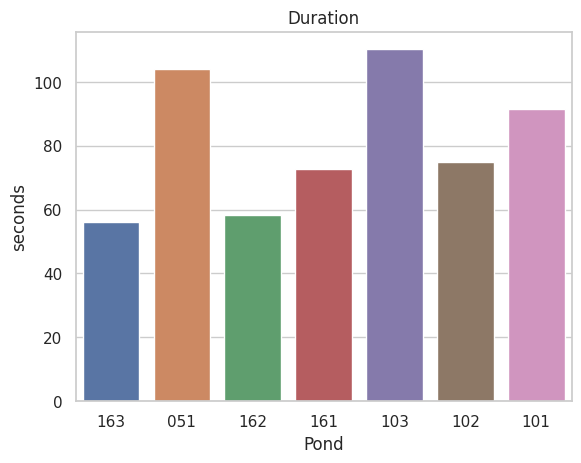

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.barplot(x="Pond", y="Duration", data=df_dur)

# Add chart title and axis labels
plt.title("Duration")
plt.xlabel("Pond")
plt.ylabel("seconds")

# Display the chart
plt.show()

In [15]:
# label 0 -> stop feeding
for key, df in df_dict.items():
  start_time = df[df['label'] == 0].head(1)['timestamp'].iloc[0]
  end_time = df[df['label'] == 0].tail(1)['timestamp'].iloc[0]

  feeding_duration = (end_time - start_time).total_seconds()
  
  print(f"Duration of time fish are eating in {key} / label 0: {feeding_duration} seconds, Start: {start_time}, End: {end_time}")

Duration of time fish are eating in 163 / label 0: 56.12 seconds, Start: 2022-07-06 07:40:58.160000, End: 2022-07-06 07:41:54.280000
Duration of time fish are eating in 051 / label 0: 103.96 seconds, Start: 2022-07-06 07:43:38.320000, End: 2022-07-06 07:45:22.280000
Duration of time fish are eating in 162 / label 0: 58.2 seconds, Start: 2022-07-06 07:46:20.560000, End: 2022-07-06 07:47:18.760000
Duration of time fish are eating in 161 / label 0: 72.76 seconds, Start: 2022-07-06 07:48:31.600000, End: 2022-07-06 07:49:44.360000
Duration of time fish are eating in 103 / label 0: 110.2 seconds, Start: 2022-07-06 07:51:34.640000, End: 2022-07-06 07:53:24.840000
Duration of time fish are eating in 102 / label 0: 74.84 seconds, Start: 2022-07-06 07:54:39.760000, End: 2022-07-06 07:55:54.600000
Duration of time fish are eating in 101 / label 0: 91.48 seconds, Start: 2022-07-06 07:57:26.160000, End: 2022-07-06 07:58:57.640000


# Feeding Schedule

In [16]:
df_dict['101'].describe()

,x,y,z,label
count,4576.000000,4576.000000,4576.000000,4576.000000
mean,-1.032561,244.569056,42.372596,0.500000
std,4.441979,6.876938,5.405921,0.500055
min,-51.000000,176.000000,-8.000000,0.000000
25%,-2.000000,243.000000,40.000000,0.000000
50%,-1.000000,245.000000,42.000000,0.500000
75%,0.000000,247.000000,44.000000,1.000000
max,50.000000,320.000000,136.000000,1.000000


In [17]:
df_dict['102'].describe()

,x,y,z,label
count,3744.000000,3744.000000,3744.000000,3744.000000
mean,-0.563568,245.776976,43.783654,0.500000
std,4.716286,6.043452,5.475244,0.500067
min,-64.000000,218.000000,-16.000000,0.000000
25%,-1.000000,244.000000,41.000000,0.000000
50%,0.000000,246.000000,43.000000,0.500000
75%,0.000000,248.000000,45.000000,1.000000
max,41.000000,314.000000,107.000000,1.000000


In [18]:
df_dict['161'].describe()

,x,y,z,label
count,3640.000000,3640.000000,3640.000000,3640.000000
mean,0.440110,245.359066,41.341209,0.500000
std,8.015973,8.937721,7.097721,0.500069
min,-97.000000,169.000000,6.000000,0.000000
25%,-1.000000,243.000000,39.000000,0.000000
50%,0.000000,246.000000,40.000000,0.500000
75%,1.000000,248.000000,43.000000,1.000000
max,84.000000,301.000000,87.000000,1.000000


In [19]:
df_dict['162'].describe()

,x,y,z,label
count,2912.000000,2912.000000,2912.000000,2912.000000
mean,-0.265797,245.530907,42.010989,0.500000
std,8.729026,10.481064,8.877611,0.500086
min,-51.000000,181.000000,-48.000000,0.000000
25%,-3.000000,242.000000,38.000000,0.000000
50%,0.000000,246.000000,41.000000,0.500000
75%,2.000000,249.000000,45.000000,1.000000
max,55.000000,301.000000,171.000000,1.000000


In [20]:
df_dict['051'].describe()

,x,y,z,label
count,5200.000000,5200.000000,5200.000000,5200.000000
mean,-0.770769,246.844423,37.432500,0.500000
std,8.426946,9.207793,10.517796,0.500048
min,-88.000000,189.000000,-41.000000,0.000000
25%,-3.000000,244.000000,35.000000,0.000000
50%,0.000000,247.000000,37.000000,0.500000
75%,1.000000,251.000000,40.000000,1.000000
max,190.000000,394.000000,352.000000,1.000000


Estimate how many pellets for each pond

In [31]:
# 5kg = 5000gr for each event

sum_dur = df_dur['Duration'].sum()
list_gr = []
for i in df_dur['Duration']:
  gr = round((i / sum_dur) * 5000,3)
  list_gr.append(gr)

df_dur['pellets'] = list_gr
df_dur

,Pond,Duration,pellets
0,163,56.12,494.397
1,051,103.96,915.850
2,162,58.20,512.721
3,161,72.76,640.989
4,103,110.20,970.822
5,102,74.84,659.314
6,101,91.48,805.906


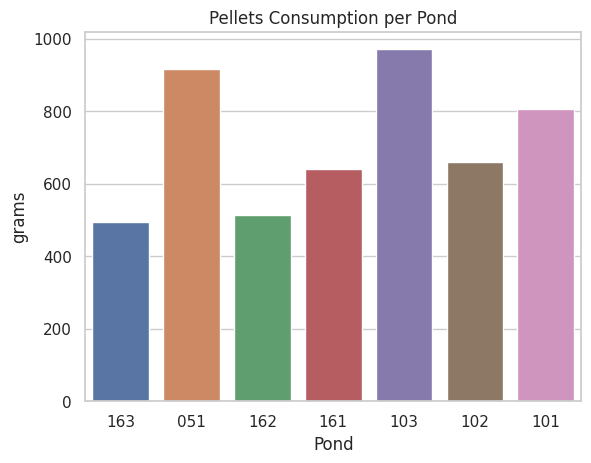

In [32]:
sns.set(style="whitegrid")
sns.barplot(x="Pond", y="pellets", data=df_dur)

# Add chart title and axis labels
plt.title("Pellets Consumption per Pond")
plt.xlabel("Pond")
plt.ylabel("grams")

# Display the chart
plt.show()

Analyze Label 1 pattern

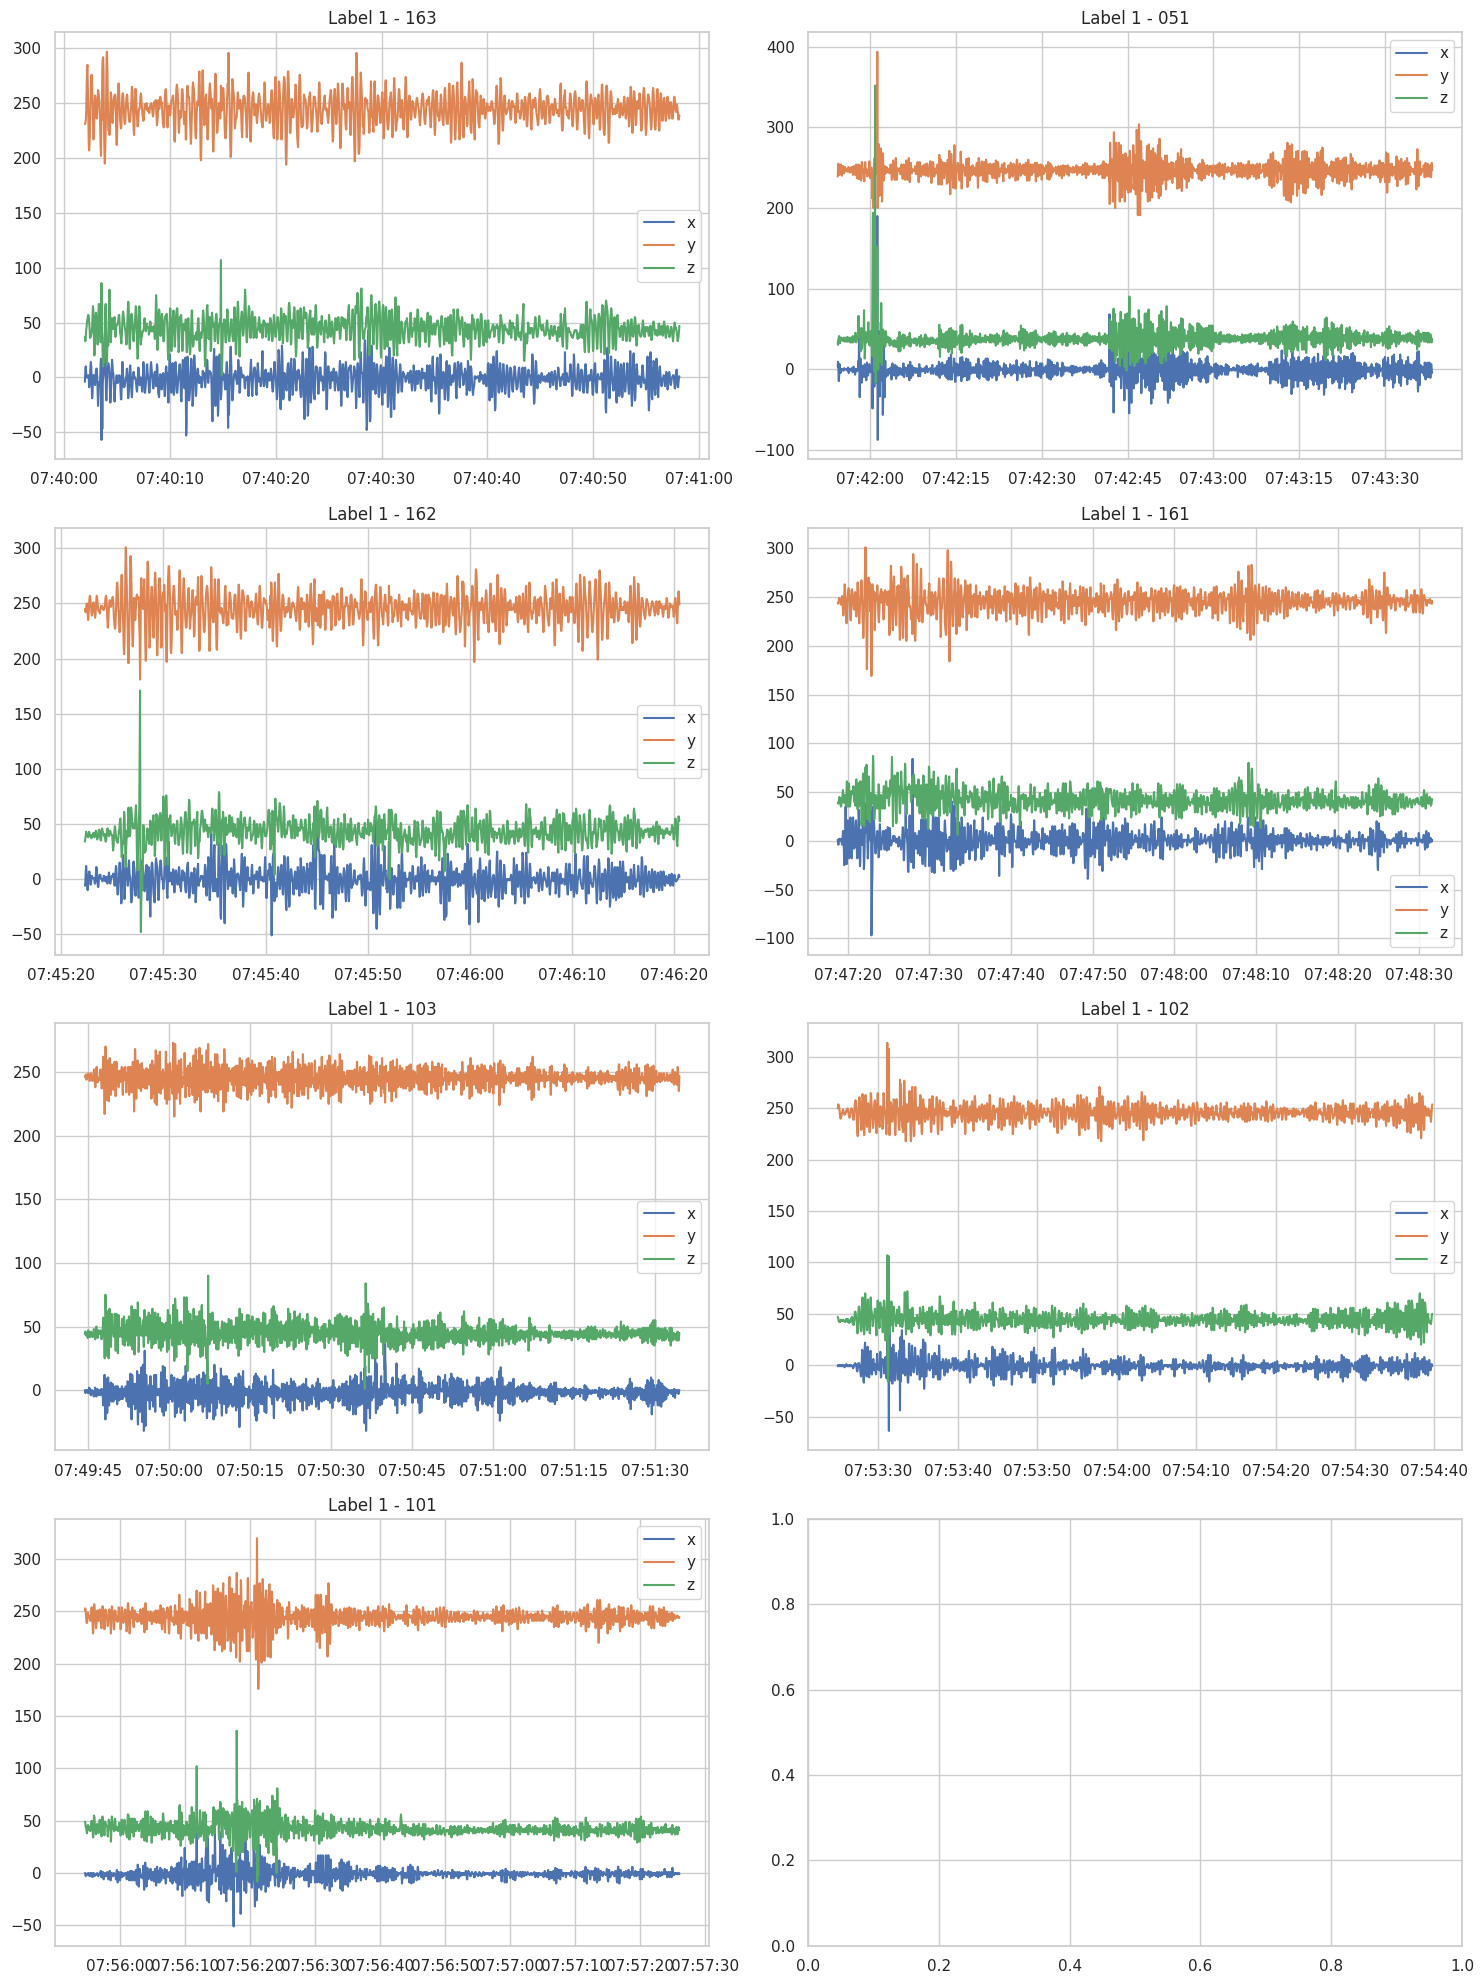

In [33]:
# create subplots for label 1
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

# plot label 1 data
for i, df in enumerate(df_dict.values()):
    ax = axes[i // 2, i % 2]
    df_label_1 = df[df['label'] == 1]
    ax.plot(df_label_1['timestamp'], df_label_1['x'], label='x')
    ax.plot(df_label_1['timestamp'], df_label_1['y'], label='y')
    ax.plot(df_label_1['timestamp'], df_label_1['z'], label='z')
    ax.set_title(f"Label 1 - {list(df_dict.keys())[i]}")
    ax.legend()

plt.tight_layout()
plt.show()

Analyze Label 0 pattern

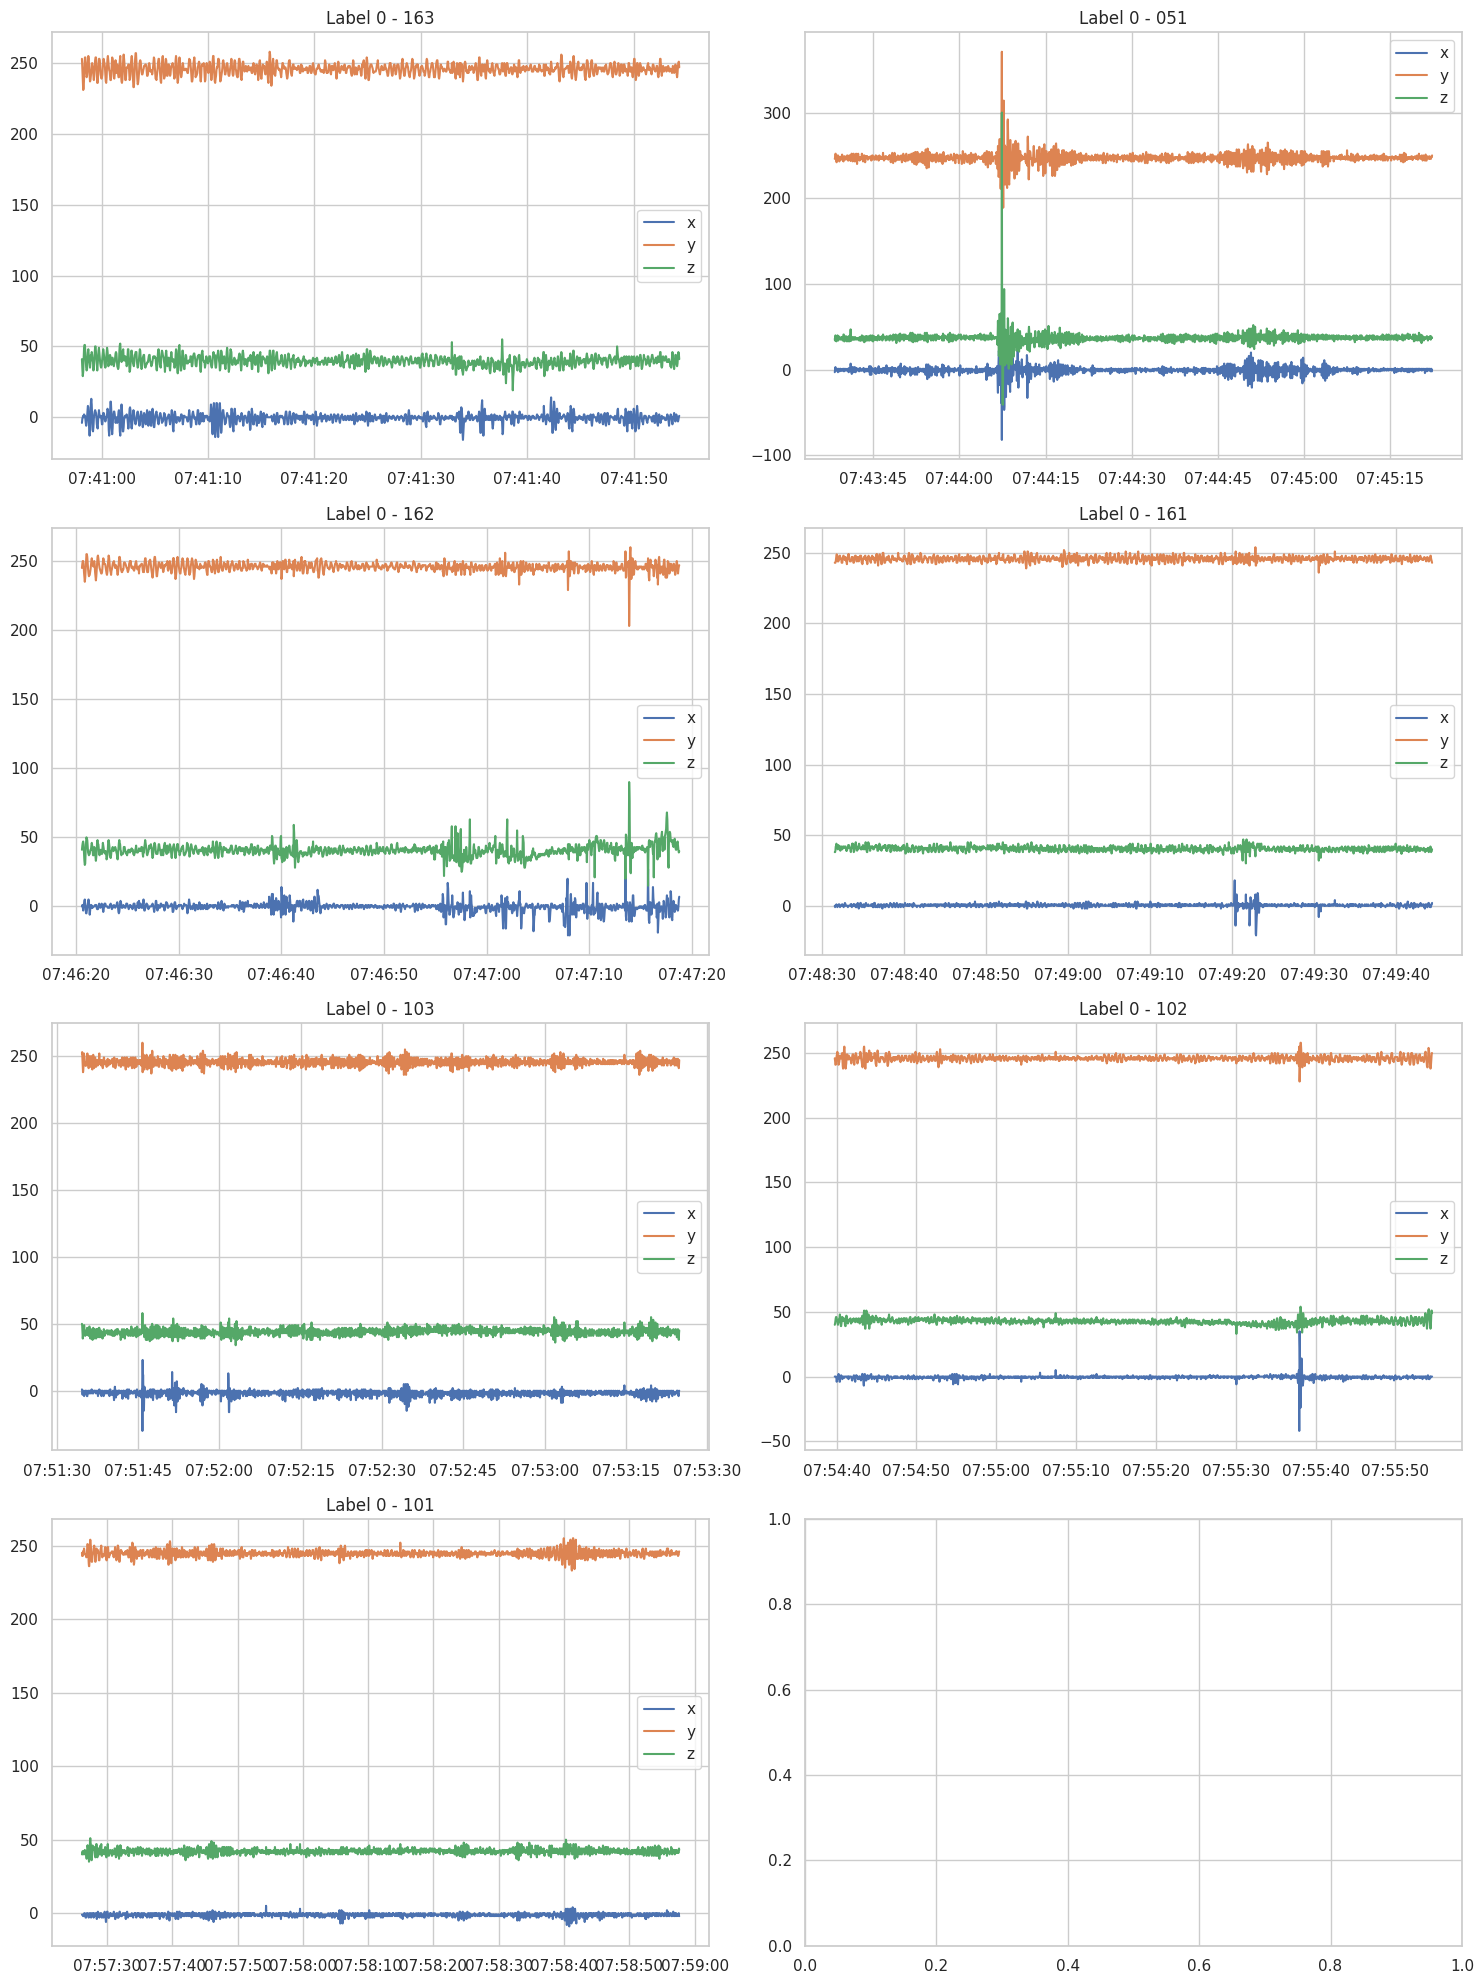

In [34]:
# create subplots for label 0
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

# plot label 0 data
for i, df in enumerate(df_dict.values()):
    ax = axes[i // 2, i % 2]
    df_label_0 = df[df['label'] == 0]
    ax.plot(df_label_0['timestamp'], df_label_0['x'], label='x')
    ax.plot(df_label_0['timestamp'], df_label_0['y'], label='y')
    ax.plot(df_label_0['timestamp'], df_label_0['z'], label='z')
    ax.set_title(f"Label 0 - {list(df_dict.keys())[i]}")
    ax.legend()

plt.tight_layout()
plt.show()

Analyze whole data pattern

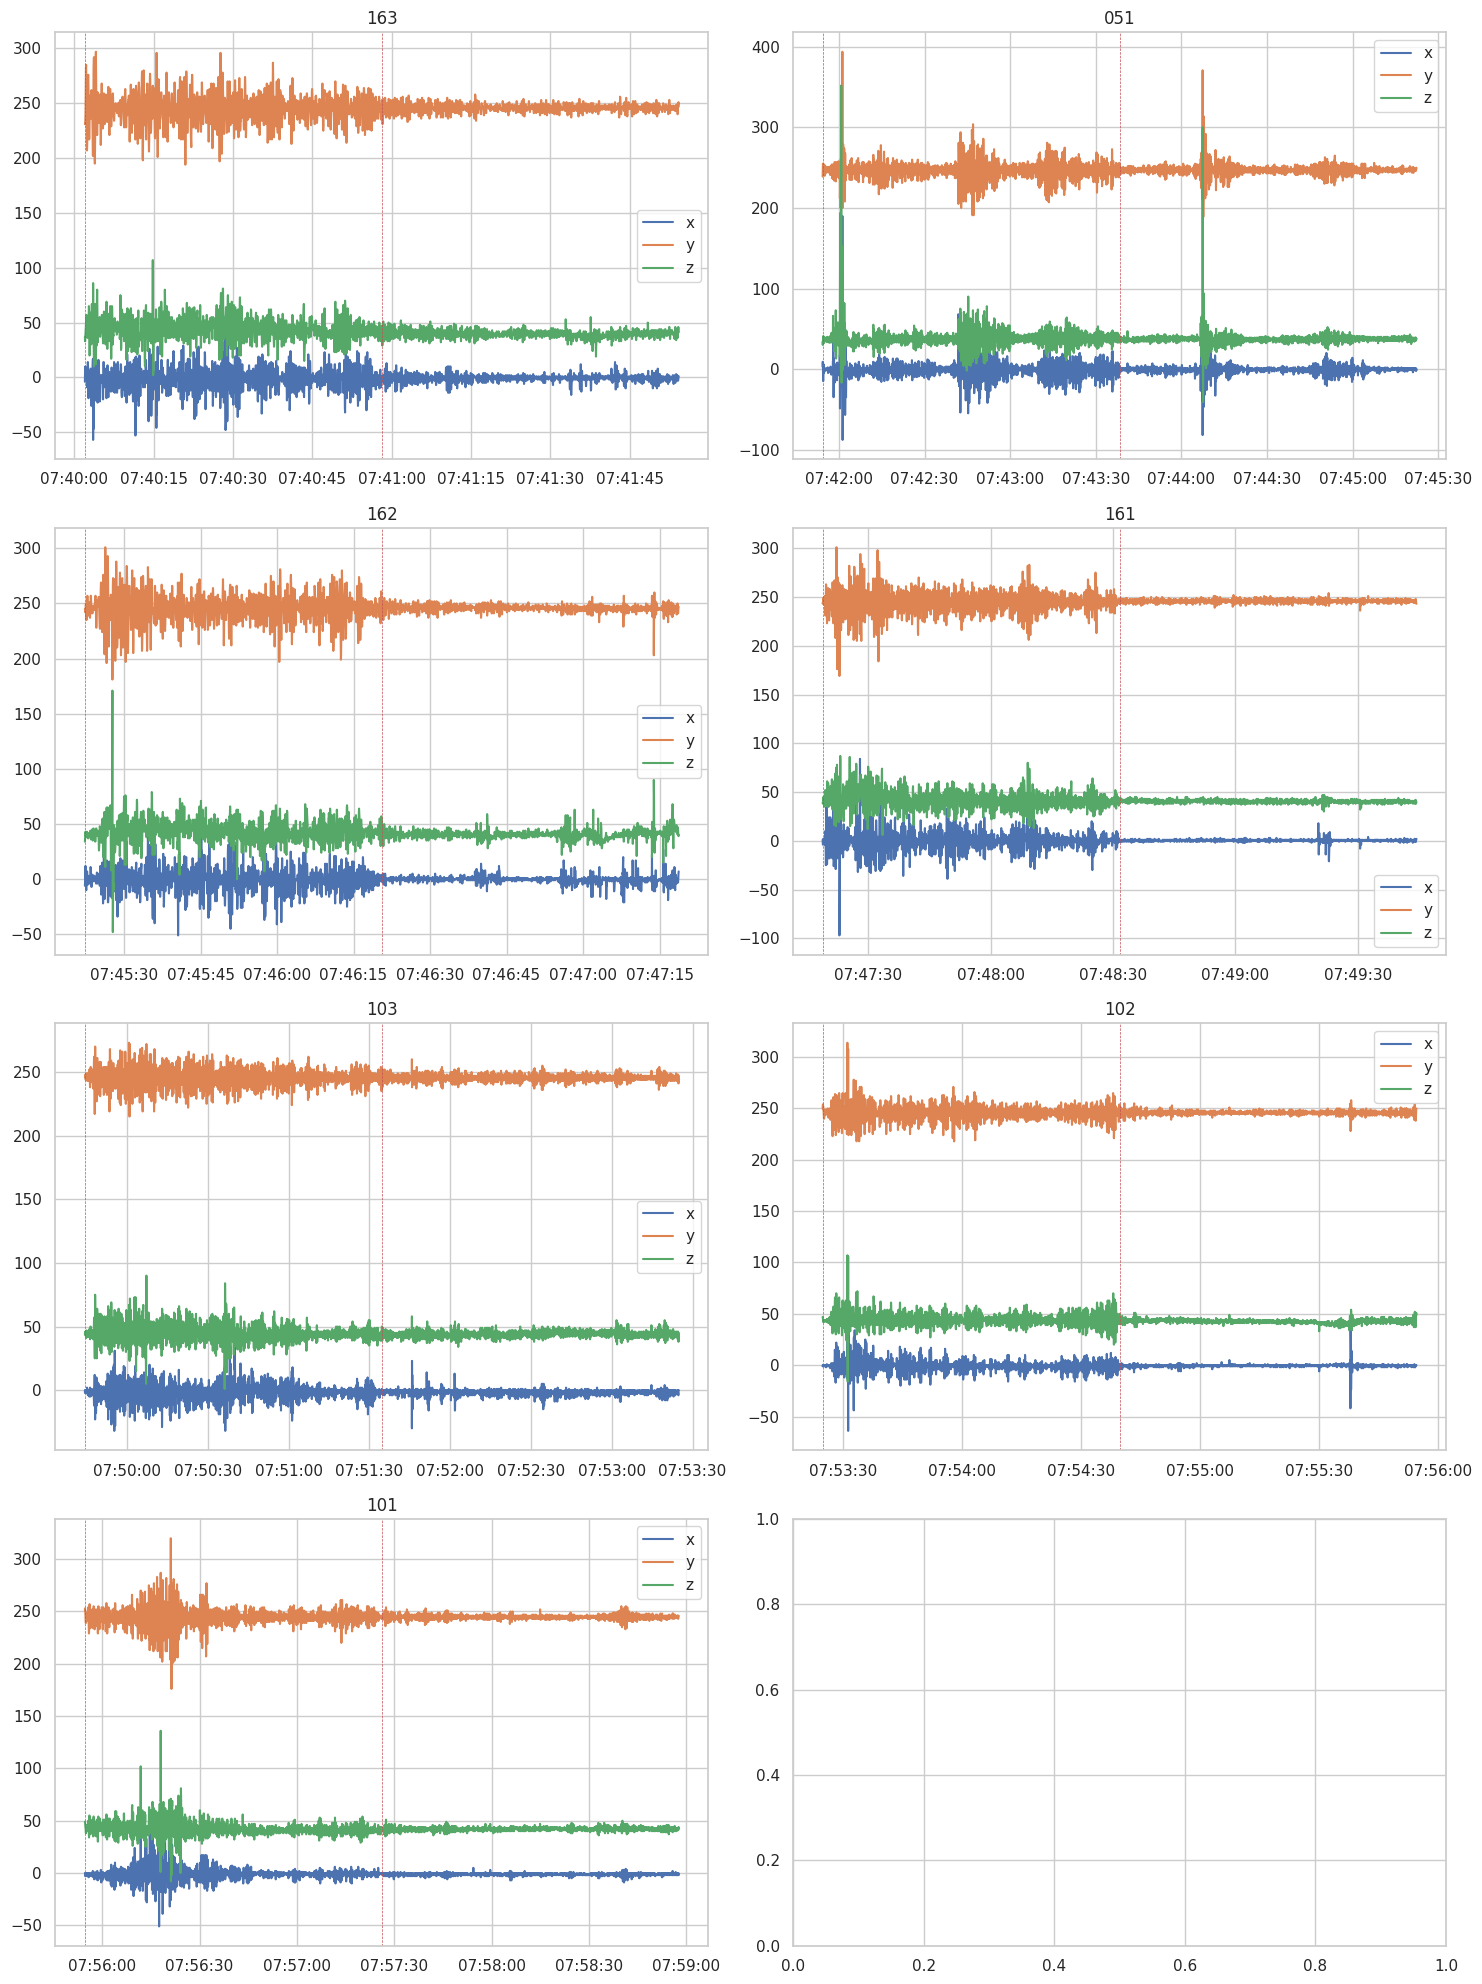

In [35]:
# create subplots for label 1 and label 0
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

# plot data
for i, df in enumerate(df_dict.values()):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.plot(df['timestamp'], df['x'], label='x')
    ax.plot(df['timestamp'], df['y'], label='y')
    ax.plot(df['timestamp'], df['z'], label='z')
    label_changes = df[df['label'].diff() != 0]
    for index, row in label_changes.iterrows():
        ax.axvline(x=row['timestamp'], color='r', linestyle='--', linewidth=0.5)
    ax.set_title(f"{list(df_dict.keys())[i]}")
    ax.legend()

plt.tight_layout()
plt.show()

# Analyze fish movement while eating and not eating for each ponds
- assumption : each accelerometer has "starting point" or default value
- we want to know how much the movement changes by calculating the difference of current value and previous value of x,y,z columns
- starting points are obtained from median for each ponds (approximately)
- x : 0
- y : 245
- z : 40

In [36]:
for key, df in df_dict.items(): 
  df['x_diff'] = abs(df['x'].diff())
  df['y_diff'] = abs(df['y'].diff())
  df['z_diff'] = abs(df['z'].diff())

  df.iloc[0, df.columns.get_loc('x_diff')] = abs(df.iloc[0, df.columns.get_loc('x')] - 0)
  df.iloc[0, df.columns.get_loc('y_diff')] = abs(df.iloc[0, df.columns.get_loc('y')] - 245)
  df.iloc[0, df.columns.get_loc('z_diff')] = abs(df.iloc[0, df.columns.get_loc('z')] - 40)

In [37]:
# Label 1
results_dict = {}

for key, df in df_dict.items():
    # Calculate the sums
    sum_label_1 = df[df['label'] == 1][['x_diff', 'y_diff', 'z_diff']].sum()

    # Calculate the means
    mean_label_1 = round(df[df['label'] == 1][['x_diff', 'y_diff', 'z_diff']].mean(),2)

    results_dict[key] = {
        'sum_label_1_x': sum_label_1['x_diff'],
        'sum_label_1_y': sum_label_1['y_diff'],
        'sum_label_1_z': sum_label_1['z_diff'],
        'mean_label_1_x': mean_label_1['x_diff'],
        'mean_label_1_y': mean_label_1['y_diff'],
        'mean_label_1_z': mean_label_1['z_diff'],
    }

results_df_1 = pd.DataFrame.from_dict(results_dict, orient='index')


In [38]:
results_df_1

,sum_label_1_x,sum_label_1_y,sum_label_1_z,mean_label_1_x,mean_label_1_y,mean_label_1_z
163,10269.0,10666.0,8913.0,7.31,7.60,6.35
051,15098.0,14832.0,13957.0,5.81,5.70,5.37
162,10124.0,10652.0,8569.0,6.95,7.32,5.89
161,11429.0,11343.0,9996.0,6.28,6.23,5.49
103,10720.0,10822.0,10839.0,3.89,3.93,3.93
102,6747.0,8079.0,7528.0,3.60,4.32,4.02
101,7069.0,9365.0,8029.0,3.09,4.09,3.51


In [39]:
# Label 0
results_dict = {}

for key, df in df_dict.items():
    # Calculate the sums
    sum_label_0 = df[df['label'] == 0][['x_diff', 'y_diff', 'z_diff']].sum()

    # Calculate the means
    mean_label_0 = round(df[df['label'] == 0][['x_diff', 'y_diff', 'z_diff']].mean(),2)

    results_dict[key] = {
        'sum_label_0_x': sum_label_0['x_diff'],
        'sum_label_0_y': sum_label_0['y_diff'],
        'sum_label_0_z': sum_label_0['z_diff'],
        'mean_label_0_x': mean_label_0['x_diff'],
        'mean_label_0_y': mean_label_0['y_diff'],
        'mean_label_0_z': mean_label_0['z_diff'],
    }

results_df_0 = pd.DataFrame.from_dict(results_dict, orient='index')
results_df_0

,sum_label_0_x,sum_label_0_y,sum_label_0_z,mean_label_0_x,mean_label_0_y,mean_label_0_z
163,2908.0,3124.0,3116.0,2.07,2.23,2.22
051,6306.0,7035.0,6344.0,2.43,2.71,2.44
162,2951.0,2764.0,3511.0,2.03,1.90,2.41
161,1273.0,2041.0,2094.0,0.70,1.12,1.15
103,3534.0,4132.0,4264.0,1.28,1.50,1.55
102,1427.0,2152.0,2323.0,0.76,1.15,1.24
101,1747.0,2648.0,2680.0,0.76,1.16,1.17
